## Observations and Insights 

1) The Ramicane and Capomulin regimens saw notably greater reductions in tumor volume over timepoints than the other regimens. 

2) The Ramicane and Capomulin regimens had a greater number of sample measurements than other regimens, which reinforces their favorable performance results.

3) Mice gender distribution seemed appropriate, but believe drug regimen performance could be evaluated based on mice gender as well.

4) Of the four most promising drug regimens, only Infubinol had one statistical outlier (c326, Female, 18 mos., 25g, Timepoint=5, TV=36.321346), but had a 19.3% drop in tumor volume in only two samples taken.  May lend some credibility to more gender specific analysis.

5) Chose a male mouse l897 reasonably close to the mean age and weight of those using Capomulin regimen for an individual evaluation of tumor volume reduction over timepoints.  Notable reduction present.

6) There was a reasonably good positive correlation between mouse weight and average tumor volume for the Capomulin regimen.

7) The linear regression analysis between mouse weight and average tumor volume for the Capomulin regimen showed some predictability.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].unique()
mice_count = len(mice)
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = cleaned_data["Mouse ID"].unique()
cleaned_mice_count = len(cleaned_mice)
cleaned_mice_count

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_group = cleaned_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median = regimen_group["Tumor Volume (mm3)"].median()
regimen_var = regimen_group["Tumor Volume (mm3)"].var()
regimen_std = regimen_group["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_data = {'Tumor Volume (mm3) Mean': regimen_mean, 'Tumor Volume (mm3) Median': regimen_median, 'Tumor Volume (mm3) Variance': regimen_var, 'Tumor Volume (mm3) Standard Deviation': regimen_std, 'Tumor Volume (mm3) Standard Error': regimen_SEM}
regimen_summary = pd.DataFrame(data=summary_data)
regimen_summary

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

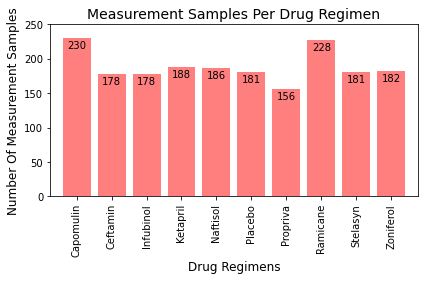

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
sample_counts = regimen_group["Drug Regimen"].count()
x_axis = np.arange(len(sample_counts))
plt.bar(x_axis, sample_counts, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, 250)
plt.title("Measurement Samples Per Drug Regimen", fontsize=14)
plt.xlabel("Drug Regimens", fontsize=12)
plt.ylabel("Number Of Measurement Samples", fontsize=12)
for index,data in enumerate(sample_counts):
    plt.text(x=index-0.275 , y=data-15 , s=f"{data}", fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()

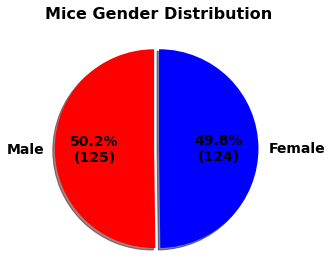

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_group = cleaned_data.drop_duplicates(subset=['Mouse ID'], keep="first")
gender = ["Male", "Female"]
male_mice = (mouse_group['Sex'].values == "Male").sum()
female_mice = (mouse_group['Sex'].values == "Female").sum()
gender_counts = [male_mice, female_mice]
colors = ["red", "blue"]
explode = (0.05, 0)
plt.pie(gender_counts, explode=explode, labels=gender, colors=colors, autopct=lambda p : '{:.1f}%\n({:,.0f})'.format(p,p * sum(gender_counts)/100), shadow=True, startangle=90, textprops={'fontsize': 14, 'weight':'bold'})
plt.title("Mice Gender Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime_data = cleaned_data.drop_duplicates(subset="Mouse ID", keep="last")

In [10]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty dataframe to fill with tumor vol data (for plotting)
tumor_vol_data = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
# Locate the rows which contain mice on each drug and get the tumor volumes
for element in treatments:
    last_tumor_vols = lasttime_data.loc[lasttime_data["Drug Regimen"] == element, ['Drug Regimen', 'Tumor Volume (mm3)']]
    tumor_vol_data = tumor_vol_data.append(last_tumor_vols)
    
# Get regimen tumor volume lists from filled dataframe  
Capomulin_data = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"] == 'Capomulin', 'Tumor Volume (mm3)']
Ramicane_data = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"] == 'Ramicane', 'Tumor Volume (mm3)']
Infubinol_data = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"] == 'Infubinol', 'Tumor Volume (mm3)']
Ceftamin_data = tumor_vol_data.loc[tumor_vol_data["Drug Regimen"] == 'Ceftamin', 'Tumor Volume (mm3)']

# Determine outliers using upper and lower bounds

# Capomulin Outliers
quartiles = Capomulin_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Capomulin_outliers = [(Capomulin_data < lower_bound) | (Capomulin_data > upper_bound)]
Capomulin_outliers

[19      False
 29      False
 39      False
 64      False
 104     False
 124     False
 134     False
 144     False
 164     False
 204     False
 224     False
 244     False
 282     False
 299     False
 309     False
 317     False
 337     False
 340     False
 350     False
 360     False
 370     False
 380     False
 390     False
 440     False
 1455    False
 Name: Tumor Volume (mm3), dtype: bool]

In [11]:
# Ramicane Outliers
quartiles = Ramicane_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Ramicane_outliers = [(Ramicane_data < lower_bound) | (Ramicane_data > upper_bound)]
Ramicane_outliers

[9      False
 49     False
 59     False
 74     False
 84     False
 94     False
 114    False
 154    False
 174    False
 184    False
 194    False
 214    False
 234    False
 254    False
 262    False
 272    False
 289    False
 327    False
 400    False
 410    False
 420    False
 430    False
 447    False
 449    False
 453    False
 Name: Tumor Volume (mm3), dtype: bool]

In [12]:
# Infubinol Outliers
quartiles = Infubinol_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Infubinol_outliers = [(Infubinol_data < lower_bound) | (Infubinol_data > upper_bound)]
Infubinol_outliers

[463     False
 473     False
 530     False
 540     False
 637     False
 669      True
 742     False
 800     False
 834     False
 949     False
 1053    False
 1076    False
 1205    False
 1225    False
 1312    False
 1314    False
 1397    False
 1485    False
 1616    False
 1632    False
 1640    False
 1683    False
 1726    False
 1813    False
 1872    False
 Name: Tumor Volume (mm3), dtype: bool]

In [13]:
# Ceftamin Outliers
quartiles = Ceftamin_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
Ceftamin_outliers = [(Ceftamin_data < lower_bound) | (Ceftamin_data > upper_bound)]
Ceftamin_outliers

[493     False
 594     False
 600     False
 617     False
 840     False
 940     False
 993     False
 1033    False
 1112    False
 1119    False
 1122    False
 1132    False
 1162    False
 1260    False
 1379    False
 1406    False
 1551    False
 1582    False
 1583    False
 1670    False
 1743    False
 1773    False
 1797    False
 1845    False
 1855    False
 Name: Tumor Volume (mm3), dtype: bool]

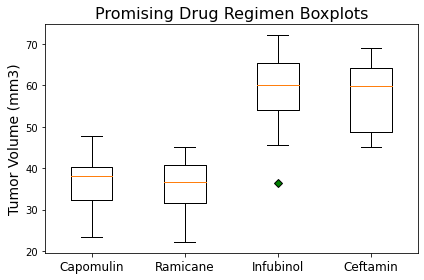

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_data, Ramicane_data, Infubinol_data, Ceftamin_data]
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Regimen Boxplots', fontsize=16)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(data, flierprops=green_diamond)
plt.xticks([1, 2, 3, 4], treatments, fontsize=12)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

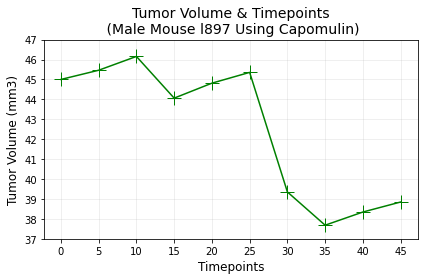

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_data = cleaned_data.loc[cleaned_data["Mouse ID"] == 'l897', ['Timepoint', 'Tumor Volume (mm3)']]
time_data = line_data['Timepoint']
TV_data = line_data['Tumor Volume (mm3)']
plt.plot(time_data, TV_data, marker='+', markersize=14, color='g', alpha=1.0)
plt.title("Tumor Volume & Timepoints\n (Male Mouse l897 Using Capomulin)", fontsize=14)
plt.grid(True, alpha=0.25)
plt.xticks(np.arange(0, 50, step=5))
plt.yticks(np.arange(37, 48, step=1))
plt.xlabel("Timepoints", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.tight_layout()
plt.show()

## Correlation And Regression

In [16]:
scatter_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
mouse_weight = scatter_data.groupby("Mouse ID")['Weight (g)'].unique()
avg_tumor_vol = scatter_data.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
x_values = mouse_weight.astype('int32')
y_values = avg_tumor_vol.astype('float64')
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen: {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen: 0.84


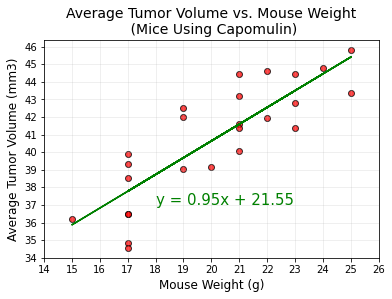

The r-squared value: 0.709


In [17]:
# Generate a scatter plot with linear regression of average tumor volume vs. mouse weight for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"g-")
plt.annotate(line_eq,(18,37),fontsize=15,color="green")
plt.title("Average Tumor Volume vs. Mouse Weight\n (Mice Using Capomulin)", fontsize=14)
plt.grid(True, alpha=0.25)
plt.xticks(np.arange(14, 27, step=1))
plt.yticks(np.arange(34, 47, step=1))
plt.xlabel("Mouse Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.show()
print(f"The r-squared value: {round(rvalue**2,3)}")